In [1]:
%load_ext autoreload

In [2]:
autoreload 2

In [3]:
import sys
!{sys.executable} -m pip install -r ../../requirements.txt

  Using cached catboost-1.2.7-cp312-cp312-win_amd64.whl.metadata (1.2 kB)
  Using cached matplotlib-3.9.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached catboost-1.2.7-cp312-cp312-win_amd64.whl (101.7 MB)
Using cached matplotlib-3.9.3-cp312-cp312-win_amd64.whl (7.8 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.3
    Uninstalling matplotlib-3.8.3:
      Successfully uninstalled matplotlib-3.8.3
  Attempting uninstall: catboost
    Found existing installation: catboost 1.2.5
    Uninstalling catboost-1.2.5:
      Successfully uninstalled catboost-1.2.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fedot 0.7.4 requires scipy<1.13.0, but you have scipy 1.13.1 which is incompatible.
thegolem 0.4.0 requires tqdm~=4.65.0, but you have tqdm 4.67.1 which is incompatible.


In [4]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

helper_path = os.path.abspath(os.path.join('../helper'))
if helper_path not in sys.path:
    sys.path.append(helper_path)

from helper.dataclass import HDDDataset
from helper.models.mymodel import MyModel
from helper.preprocessing import *
from helper.metrics import *
from helper.eda import *
from sklearn.model_selection import train_test_split
from helper.metrics import *
from helper.saver import Saver

## Data preprocessing

In [5]:
hdd_dataset = HDDDataset.read_csv('ST14000NM001G.csv')

In [6]:
preprocessor1 = Preprocessing(hdd_dataset)
preprocessor1.clear_unused_data()
preprocessor1.add_target_column()
preprocessor1.prepare_train_df()
preprocessor1.add_time_features()
preprocessor1.train_test_val_split()
preprocessor1.normalize_data(method='formulae', inplace=False)
preprocessor1.normalize_data(method='formulae', inplace=False)

Clearing unused columns...
Adding target column...
Prepairing train dataset...
Adding time features to unsplitted dataset...
Splitting train dataset...
Normalizing splitted dataset with formulae...
Normalizing splitted dataset with formulae...


In [7]:
preprocessor2 = Preprocessing(hdd_dataset)
preprocessor2.clear_unused_data()
preprocessor2.add_target_column()
preprocessor2.prepare_train_df()
preprocessor2.add_time_features()
preprocessor2.train_test_val_split()
preprocessor2.normalize_data(method='formulae', inplace=True)

Clearing unused columns...
Adding target column...
Prepairing train dataset...
Adding time features to unsplitted dataset...
Splitting train dataset...
Normalizing splitted dataset with formulae...


## Training

In [8]:
model1 = MyModel('XGBoost')
model1.fit_tpe(preprocessor1.X_train, preprocessor1.y_train, preprocessor1.X_val, preprocessor1.y_val)
print(model1.get_hyperparams())

[I 2024-12-24 00:42:55,739] A new study created in memory with name: no-name-7d9700e2-800a-4db3-be7b-2ab785a7b632
[I 2024-12-24 00:44:05,634] Trial 0 finished with value: 0.032833241693504045 and parameters: {'n_estimators': 190, 'max_depth': 11, 'learning_rate': 0.008837260490123374, 'subsample': 0.6357052095160788, 'colsample_bytree': 0.7831424118669548, 'gamma': 2.2231908254287926, 'reg_alpha': 0.05883319876264275, 'reg_lambda': 1.5362754996035138e-07}. Best is trial 0 with value: 0.032833241693504045.
[I 2024-12-24 00:44:28,494] Trial 1 finished with value: 0.021250758955676987 and parameters: {'n_estimators': 110, 'max_depth': 5, 'learning_rate': 0.0012881895374125306, 'subsample': 0.8542906095764791, 'colsample_bytree': 0.6909235424969569, 'gamma': 3.2557163800880016, 'reg_alpha': 2.2364517473100975e-08, 'reg_lambda': 0.010780058932832416}. Best is trial 0 with value: 0.032833241693504045.
[I 2024-12-24 00:45:22,259] Trial 2 finished with value: 0.039384615384615386 and parameter

Лучшие гиперпараметры: {'n_estimators': 477, 'max_depth': 15, 'learning_rate': 0.24326286538202124, 'subsample': 0.7311988030287053, 'colsample_bytree': 0.836713816504955, 'gamma': 0.02554774271167129, 'reg_alpha': 0.00018050602784871366, 'reg_lambda': 7.586185891243698e-08}
Лучшая оценка: 0.7264957264957265
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.836713816504955, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.02554774271167129, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.24326286538202124, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 15, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators'

In [9]:
model2 = MyModel('XGBoost')
model2.fit_tpe(preprocessor2.X_train, preprocessor2.y_train, preprocessor2.X_val, preprocessor2.y_val)
print(model2.get_hyperparams())

[I 2024-12-24 01:42:11,854] A new study created in memory with name: no-name-24684c40-7109-4c95-a82d-326abc1351d8
[I 2024-12-24 01:42:57,450] Trial 0 finished with value: 0.30943396226415093 and parameters: {'n_estimators': 118, 'max_depth': 14, 'learning_rate': 0.146939131558301, 'subsample': 0.9717354026780481, 'colsample_bytree': 0.757133557521028, 'gamma': 0.8109921217142824, 'reg_alpha': 9.146524696381679e-07, 'reg_lambda': 0.047021842765663055}. Best is trial 0 with value: 0.30943396226415093.
[I 2024-12-24 01:44:08,090] Trial 1 finished with value: 0.03815580286168521 and parameters: {'n_estimators': 282, 'max_depth': 8, 'learning_rate': 0.0012193482681784927, 'subsample': 0.9030216988282354, 'colsample_bytree': 0.6691141299198303, 'gamma': 2.6536967695440494, 'reg_alpha': 1.3565312668561063e-07, 'reg_lambda': 0.4784588684639134}. Best is trial 0 with value: 0.30943396226415093.
[I 2024-12-24 01:45:20,780] Trial 2 finished with value: 0.46114649681528663 and parameters: {'n_esti

Лучшие гиперпараметры: {'n_estimators': 376, 'max_depth': 15, 'learning_rate': 0.09475936664056142, 'subsample': 0.8157547264696159, 'colsample_bytree': 0.7182658747258605, 'gamma': 0.16909067855256943, 'reg_alpha': 5.709379758221659e-06, 'reg_lambda': 4.393137588354057e-06}
Лучшая оценка: 0.6481481481481481
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.7182658747258605, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.16909067855256943, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.09475936664056142, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 15, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators

## Testing

In [10]:
preds1 = model1.predict(preprocessor1.X_test)
metrics1 = Metrics.get_metrics(preds1, preprocessor1.y_test)
print(metrics1)

{'accuracy': 0.9997295141089813, 'precision': 0.9438202247191011, 'recall': 0.6536964980544747, 'f1': 0.7724137931034483, 'auc_roc': 0.8268345785246276}


In [11]:
preds2 = model2.predict(preprocessor2.X_test)
metrics2 = Metrics.get_metrics(preds2, preprocessor2.y_test)
print(metrics2)

{'accuracy': 0.9997541037354375, 'precision': 0.9562841530054644, 'recall': 0.6809338521400778, 'f1': 0.7954545454545454, 'auc_roc': 0.8404559896679512}


In [13]:
from sklearn.metrics import classification_report
print(classification_report(preprocessor1.y_test, preds1))
print(classification_report(preprocessor2.y_test, preds2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    365751
           1       0.94      0.65      0.77       257

    accuracy                           1.00    366008
   macro avg       0.97      0.83      0.89    366008
weighted avg       1.00      1.00      1.00    366008

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    365751
           1       0.96      0.68      0.80       257

    accuracy                           1.00    366008
   macro avg       0.98      0.84      0.90    366008
weighted avg       1.00      1.00      1.00    366008



## Logging

In [14]:
Saver.save(model1, preprocessor1, metrics1, save_csv=False)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:32:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [15]:
Saver.save(model2, preprocessor2, metrics2, save_csv=False)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:32:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [16]:
lst1 = []
lst2 = []
for name, imp in zip(preprocessor1.X_test.columns, model1.model.feature_importances_):
    lst1.append((name, round(imp, 3)))
for name, imp in zip(preprocessor2.X_test.columns, model2.model.feature_importances_):
    lst2.append((name, round(imp, 3)))
print(sorted(lst1, key=lambda x: x[1]))
print(sorted(lst2, key=lambda x: x[1]))

[('diff_smart_5_raw_1', 0.0), ('diff_smart_9_raw_1', 0.004), ('diff_smart_199_raw_1', 0.004), ('diff_smart_240_raw_1', 0.004), ('diff_smart_241_raw_1', 0.004), ('diff_smart_242_raw_1', 0.004), ('smart_9_raw_normalized', 0.005), ('smart_241_raw_normalized', 0.005), ('shift_smart_9_raw_1', 0.006), ('smart_242_raw_normalized', 0.006), ('smart_240_raw', 0.007), ('shift_smart_240_raw_1', 0.007), ('shift_smart_241_raw_1', 0.007), ('smart_192_raw_normalized', 0.007), ('smart_240_raw_normalized', 0.007), ('shift_smart_242_raw_1', 0.008), ('smart_241_raw', 0.009), ('diff_smart_188_raw_1', 0.009), ('smart_199_raw_normalized', 0.009), ('smart_242_raw', 0.01), ('shift_smart_192_raw_1', 0.01), ('smart_9_raw', 0.011), ('diff_smart_192_raw_1', 0.011), ('smart_188_raw_normalized', 0.011), ('shift_smart_5_raw_1', 0.012), ('shift_smart_197_raw_1', 0.012), ('shift_smart_199_raw_1', 0.015), ('shift_smart_188_raw_1', 0.017), ('shift_smart_187_raw_1', 0.019), ('smart_192_raw', 0.021), ('smart_188_raw', 0.02

C:\Users\user\AppData\Local\Temp\ipykernel_11100\124766063.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


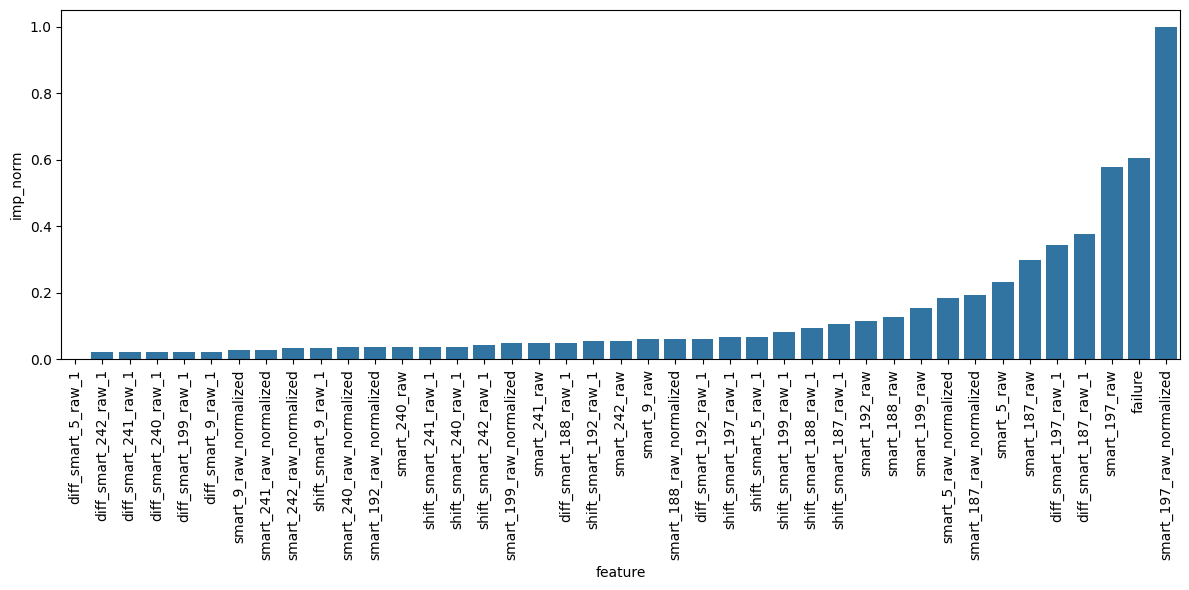

C:\Users\user\AppData\Local\Temp\ipykernel_11100\124766063.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


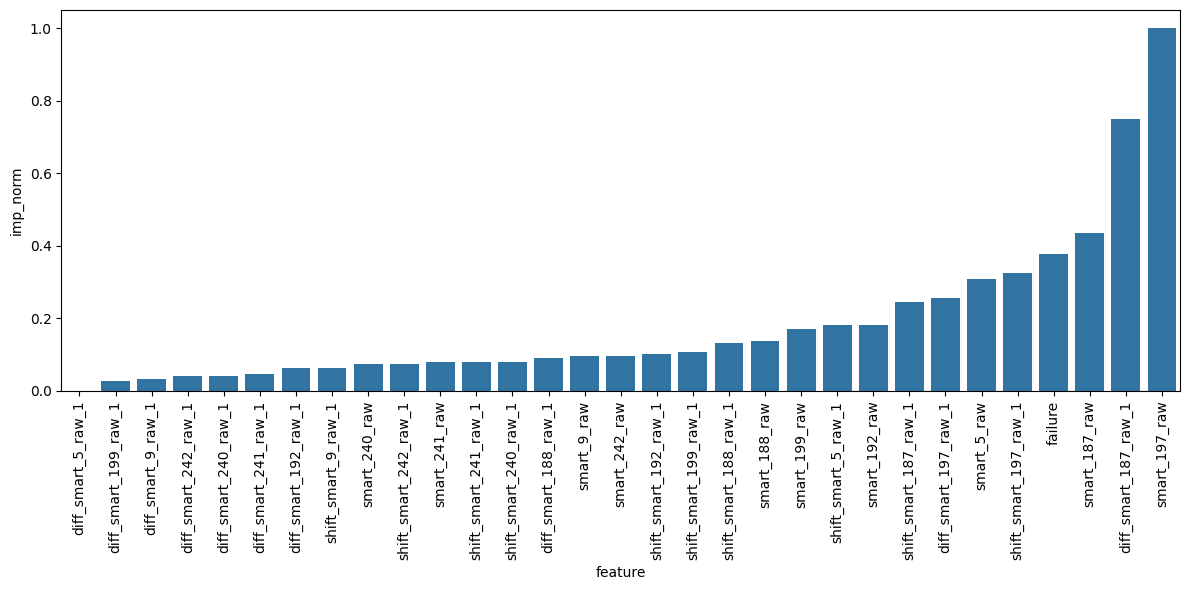

In [17]:
import seaborn as sns
data1 = []
data2 = []

for name, imp in zip(preprocessor1.X_test.columns, model1.model.feature_importances_):
    data1.append({'feature': name, 'imp': round(imp, 3)})
for name, imp in zip(preprocessor2.X_test.columns, model2.model.feature_importances_):
    data2.append({'feature': name, 'imp': round(imp, 3)})
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df1['imp_norm'] = df1['imp'].transform(lambda x: x / x.max())
df2['imp_norm'] = df2['imp'].transform(lambda x: x / x.max())
df1 = df1.sort_values(by=['imp_norm'])
df2 = df2.sort_values(by=['imp_norm'])


plt.figure(figsize=(12, 6))
ax = sns.barplot(x='feature', y='imp_norm', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout() 
plt.show()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='feature', y='imp_norm', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()  
plt.show()